<a href="https://colab.research.google.com/github/imadelhassak/Cipher-Decipher-AES/blob/master/Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creation modele de prediction ANN**
**Prédire le prix des maisons**

# Le travail a été réalisé par :
*   Assaya AMANI    20004295
*   Mariam CHAGIA   19002891
*   Lamiaa ATTIA    20004490

In [32]:
#data accesss Google Drive
from google.colab import drive
drive.mount('/content/drive')

# data analysis
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# scaling and train test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# creating a model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow import keras

# evaluation on test data
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:
chemin_fichier_csv = '/content/drive/MyDrive/DataSet/MELBOURNE_HOUSE_PRICES_LESS.csv'
data  = pd.read_csv(chemin_fichier_csv)

In [34]:
print (data.columns.values)

['Suburb' 'Address' 'Rooms' 'Type' 'Price' 'Method' 'SellerG' 'Date'
 'Postcode' 'Regionname' 'Propertycount' 'Distance' 'CouncilArea']


In [35]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,Abbotsford,49 Lithgow St,3,h,1490000.0,S,Jellis,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
1,Abbotsford,59A Turner St,3,h,1220000.0,S,Marshall,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
2,Abbotsford,119B Yarra St,3,h,1420000.0,S,Nelson,1/04/2017,3067,Northern Metropolitan,4019,3.0,Yarra City Council
3,Aberfeldie,68 Vida St,3,h,1515000.0,S,Barry,1/04/2017,3040,Western Metropolitan,1543,7.5,Moonee Valley City Council
4,Airport West,92 Clydesdale Rd,2,h,670000.0,S,Nelson,1/04/2017,3042,Western Metropolitan,3464,10.4,Moonee Valley City Council


In [36]:
data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price            14590
Method               0
SellerG              0
Date                 0
Postcode             0
Regionname           0
Propertycount        0
Distance             0
CouncilArea          0
dtype: int64

In [37]:
data.dropna(subset=['Price'],inplace =True)
len(data)

48433

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  object 
 1   Address        48433 non-null  object 
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  object 
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  object 
 6   SellerG        48433 non-null  object 
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  object 
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  object 
dtypes: float64(2), int64(3), object(8)
memory usage: 5.2+ MB


In [39]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data['Suburb'] =label.fit_transform(data['Suburb'])
data['Address'] =label.fit_transform(data['Address'])
data['Type'] =label.fit_transform(data['Type'])
data['Method'] =label.fit_transform(data['Method'])
data['SellerG'] =label.fit_transform(data['SellerG'])
data['Regionname'] =label.fit_transform(data['SellerG'])
data['CouncilArea'] =label.fit_transform(data['CouncilArea'])

In [40]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Postcode,Regionname,Propertycount,Distance,CouncilArea
0,0,32929,3,0,1490000.0,1,180,1/04/2017,3067,180,4019,3.0,32
1,0,36347,3,0,1220000.0,1,225,1/04/2017,3067,225,4019,3.0,32
2,0,6375,3,0,1420000.0,1,253,1/04/2017,3067,253,4019,3.0,32
3,1,38887,3,0,1515000.0,1,28,1/04/2017,3040,28,1543,7.5,22
4,2,44313,2,0,670000.0,1,253,1/04/2017,3042,253,3464,10.4,22


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48433 entries, 0 to 63020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         48433 non-null  int64  
 1   Address        48433 non-null  int64  
 2   Rooms          48433 non-null  int64  
 3   Type           48433 non-null  int64  
 4   Price          48433 non-null  float64
 5   Method         48433 non-null  int64  
 6   SellerG        48433 non-null  int64  
 7   Date           48433 non-null  object 
 8   Postcode       48433 non-null  int64  
 9   Regionname     48433 non-null  int64  
 10  Propertycount  48433 non-null  int64  
 11  Distance       48433 non-null  float64
 12  CouncilArea    48433 non-null  int64  
dtypes: float64(2), int64(10), object(1)
memory usage: 5.2+ MB


In [42]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Suburb,48433.0,180.972808,103.813998,0.0,88.0,176.0,275.0,369.0
Address,48433.0,22370.738340,12919.428500,0.0,11176.0,22352.0,33577.0,44738.0
Rooms,48433.0,3.071666,0.944708,1.0,2.0,3.0,4.0,31.0
Type,48433.0,0.486528,0.795950,0.0,0.0,0.0,1.0,2.0
Price,48433.0,997898.241488,593498.919037,85000.0,620000.0,830000.0,1220000.0,11200000.0
Method,48433.0,1.463671,1.176422,0.0,1.0,1.0,1.0,4.0
SellerG,48433.0,206.521442,121.296754,0.0,105.0,222.0,308.0,421.0
Postcode,48433.0,3123.210332,125.534940,3000.0,3051.0,3103.0,3163.0,3980.0
Regionname,48433.0,206.521442,121.296754,0.0,105.0,222.0,308.0,421.0
Propertycount,48433.0,7566.399913,4457.405884,39.0,4280.0,6567.0,10412.0,21650.0


In [43]:
data = data.drop ('Postcode', axis  = 1)
data = data.drop ('Address', axis  = 1)

In [44]:
data['Date'] = pd.to_datetime(data['Date'])

data['month'] = data['Date'].apply(lambda date:date.month)
data['year'] = data['Date'].apply(lambda date:date.year)

data = data.drop('Date',axis=1)

# Check the new columns
print(data.columns.values)

['Suburb' 'Rooms' 'Type' 'Price' 'Method' 'SellerG' 'Regionname'
 'Propertycount' 'Distance' 'CouncilArea' 'month' 'year']


<ipython-input-44-833a2b396c38>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data['Date'])


In [45]:
data.head()

,Suburb,Rooms,Type,Price,Method,SellerG,Regionname,Propertycount,Distance,CouncilArea,month,year
0,0,3,0,1490000.0,1,180,180,4019,3.0,32,1,2017
1,0,3,0,1220000.0,1,225,225,4019,3.0,32,1,2017
2,0,3,0,1420000.0,1,253,253,4019,3.0,32,1,2017
3,1,3,0,1515000.0,1,28,28,1543,7.5,22,1,2017
4,2,2,0,670000.0,1,253,253,3464,10.4,22,1,2017


In [46]:
X = data.drop (labels =['Price'], axis  = 1)
Y = data['Price']

In [47]:
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size = 0.3,random_state=101)

In [48]:
print(X_Train.shape)
print(X_Test.shape)
print(Y_Train.shape)
print(Y_Test.shape)

(33903, 11)
(14530, 11)
(33903,)
(14530,)


In [49]:
scaler = MinMaxScaler()
X_Train = scaler.fit_transform(X_Train)
X_Test = scaler.fit_transform(X_Test)

In [50]:
print('Max: ',X_Train.max())
print('Min: ', X_Train.min())

Max:  1.0
Min:  0.0


In [51]:
model = Sequential()
model.add(Dense(11, activation = 'relu'))
model.add(Dense(80, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(1))

In [52]:
import datetime, os
logdir = os.path.join("log", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq= 1)

In [53]:
tensorboard_callback

In [54]:
model.compile( optimizer='adam', loss='mae')
#model.compile(loss='mean_squared_error', optimizer='adam',           metrics = ["accuracy"])

In [55]:
r = model.fit(X_Train, Y_Train, batch_size = 128, epochs = 100, validation_data = (X_Test, Y_Test))

Epoch 1/100
265/265 [==============================] - 2s 3ms/step - loss: 986805.0625 - val_loss: 916156.0000
Epoch 2/100
265/265 [==============================] - 1s 2ms/step - loss: 576662.6250 - val_loss: 443766.6875
Epoch 3/100
265/265 [==============================] - 0s 2ms/step - loss: 437376.8750 - val_loss: 432017.0312
Epoch 4/100
265/265 [==============================] - 0s 2ms/step - loss: 425977.1562 - val_loss: 421919.4375
Epoch 5/100
265/265 [==============================] - 0s 2ms/step - loss: 415126.7812 - val_loss: 411890.6875
Epoch 6/100
265/265 [==============================] - 0s 2ms/step - loss: 404036.0312 - val_loss: 401704.0625
Epoch 7/100
265/265 [==============================] - 1s 2ms/step - loss: 392043.4062 - val_loss: 390469.6250
Epoch 8/100
265/265 [==============================] - 0s 2ms/step - loss: 379394.3125 - val_loss: 379144.5625
Epoch 9/100
265/265 [==============================] - 1s 2ms/step - loss: 366431.5312 - val_loss: 368276.0000
E

In [56]:
tf.keras.callbacks.History()


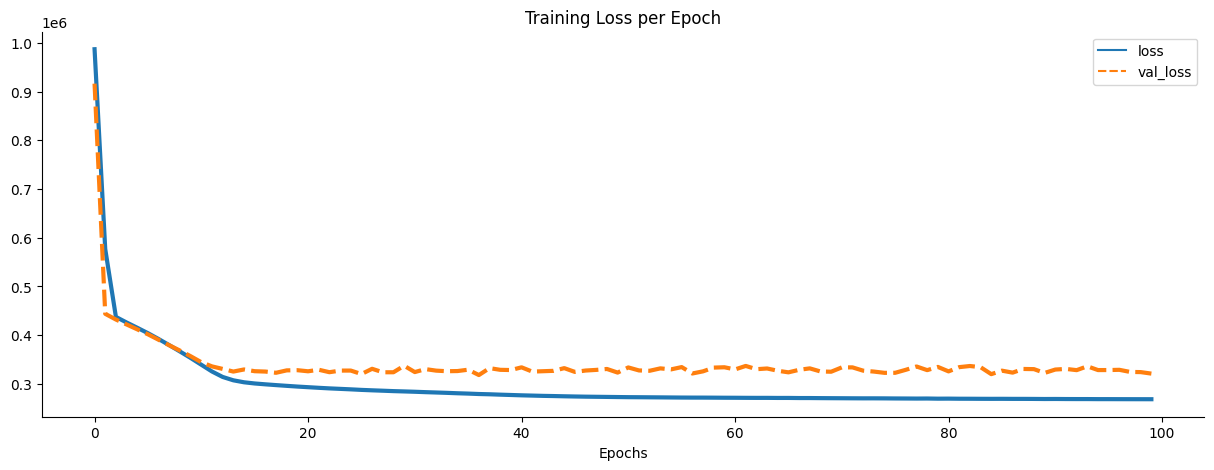

In [57]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [58]:
# predictions on the test set
predictions = model.predict(X_Test)

print('MAE: ',mean_absolute_error(Y_Test,predictions))
print('MSE: ',mean_squared_error(Y_Test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(Y_Test,predictions)))
print('Variance Regression Score: ',explained_variance_score(Y_Test,predictions))

print('\n\nDescriptive Statistics:\n',data['Price'].describe())

455/455 [==============================] - 0s 875us/step
MAE:  321051.11474535445
MSE:  287857405159.4436
RMSE:  536523.4432524301
Variance Regression Score:  0.38511934966162487


Descriptive Statistics:
 count    4.843300e+04
mean     9.978982e+05
std      5.934989e+05
min      8.500000e+04
25%      6.200000e+05
50%      8.300000e+05
75%      1.220000e+06
max      1.120000e+07
Name: Price, dtype: float64


<ipython-input-59-b09627a4ae1a>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors, ax=axes[0])


[Text(0.5, 0, 'Test True Y'),
 Text(0, 0.5, 'Model Predictions'),
 Text(0.5, 1.0, 'Model Predictions vs Perfect Fit')]

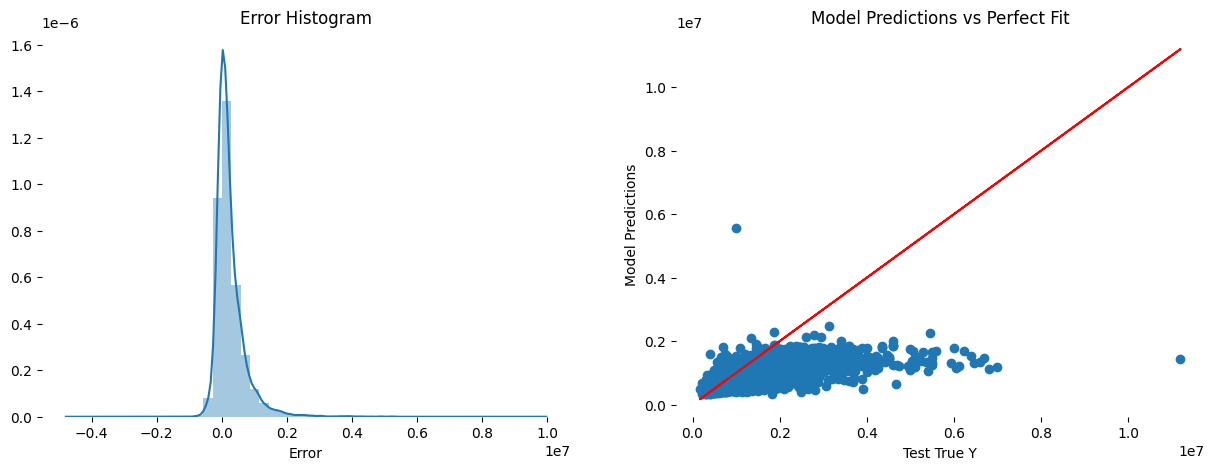

In [59]:
f, axes = plt.subplots(1, 2,figsize=(15,5))

# Our model predictions
plt.scatter(Y_Test,predictions)

# Perfect predictions
plt.plot(Y_Test,Y_Test,'r')

errors = Y_Test.values.reshape(14530, 1) - predictions
sns.distplot(errors, ax=axes[0])

sns.despine(left=True, bottom=True)
axes[0].set(xlabel='Error', ylabel='', title='Error Histogram')
axes[1].set(xlabel='Test True Y', ylabel='Model Predictions', title='Model Predictions vs Perfect Fit')

In [60]:
# fueatures of new house
single_house = data.drop('Price',axis=1).iloc[0]
print(f'Features of new house:\n{single_house}')

# reshape the numpy array and scale the features
single_house = scaler.transform(single_house.values.reshape(-1, 12))

# run the model and get the price prediction
print('\nPrediction Price:',model.predict(single_house)[0,0])

# original price
print('\nOriginal Price:',data.iloc[0]['Price'])

Features of new house:
Suburb              0.0
Rooms               3.0
Type                0.0
Method              1.0
SellerG           180.0
Regionname        180.0
Propertycount    4019.0
Distance            3.0
CouncilArea        32.0
month               1.0
year             2017.0
Name: 0, dtype: float64


ValueError: ignored